In [23]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4_86, nucleus_dataset_smooth_86, nucleus_dataset_tcps_86])

all_surfaces = all_surfaces[all_surfaces['CellType'] != 'NT']
all_surfaces_206 = all_surfaces_206[all_surfaces_206['CellType'] != 'NT']
all_surfaces_86 = all_surfaces_86[all_surfaces_86['CellType'] != 'NT']

# 20x CD86+CD206

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9299716580066132
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.920837901545657
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9295060293151183


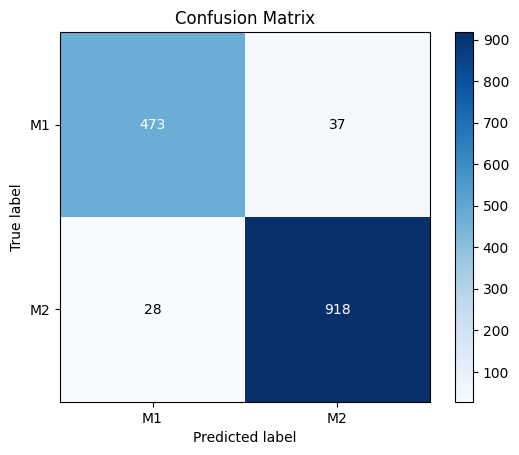

In [3]:
all_surfaces = all_surfaces[all_surfaces['CellType'] != 'NT']
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True, no_NT=True)

## One-vs-Rest multiclass ROC

AUC:  0.9912573063051859


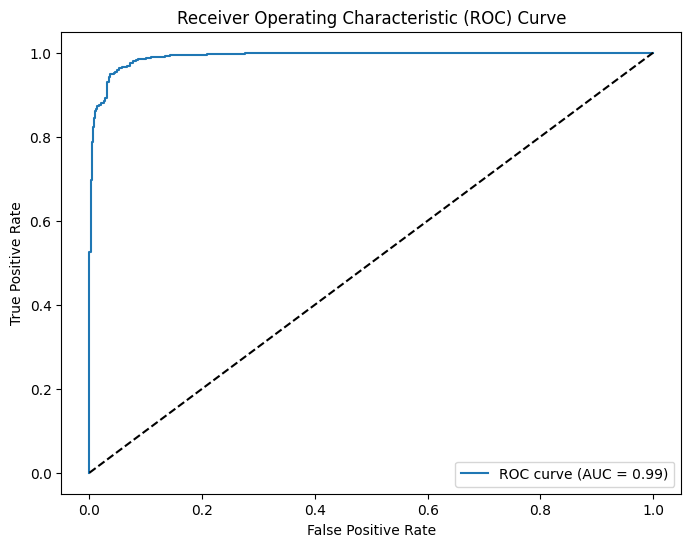

In [4]:
actual_labels = test_data[1]
predicted_probabilities = pipe.predict_proba(test_data[0])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)
print("AUC: ", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False, no_NT=True)

X_nucleus = all_surfaces_206.drop('CellType', axis=1)
y_nucleus = all_surfaces_206['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data_206 = (X_nucleus, y_nucleus)

class_proba = pipe.predict_proba(X_nucleus)

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9392405063291139
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9363190358432973
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9390221616109351


0.7785456730769231
0.7356197162041598
0.7817147034500801


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

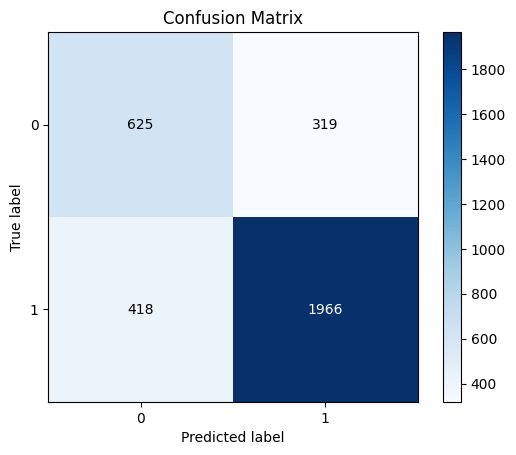

In [25]:
y_pred = class_proba[:,1] >= 0.2

accuracy = accuracy_score(y_nucleus, y_pred)
f1_macro = f1_score(y_nucleus, y_pred, average='macro')
f1_weighted = f1_score(y_nucleus, y_pred, average='weighted')
print(accuracy)
print(f1_macro)
print(f1_weighted)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

AUC:  0.831059908571266


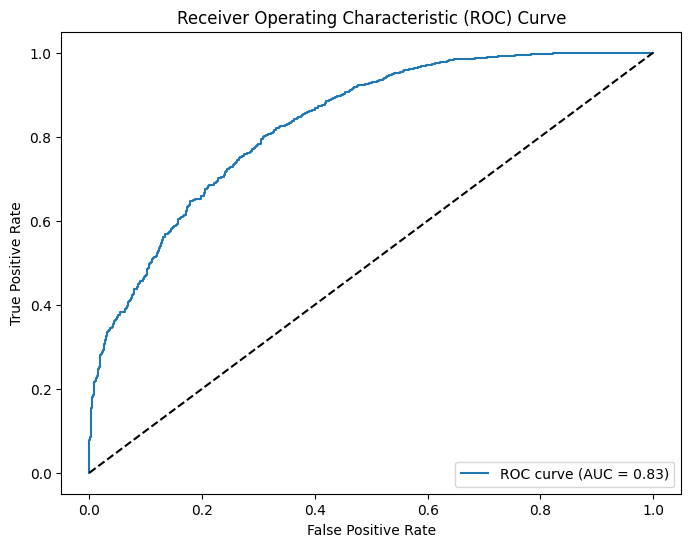

In [7]:
actual_labels = test_data[1]
predicted_probabilities = pipe.predict_proba(test_data[0])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)
print("AUC: ", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_206, confusion_matrix=False, no_NT=True)

X_nucleus = all_surfaces_86.drop('CellType', axis=1)
y_nucleus = all_surfaces_86['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

class_probabilities = pipe.predict_proba(X_nucleus)

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9550655811849842
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9432957903533807
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9545892609027404


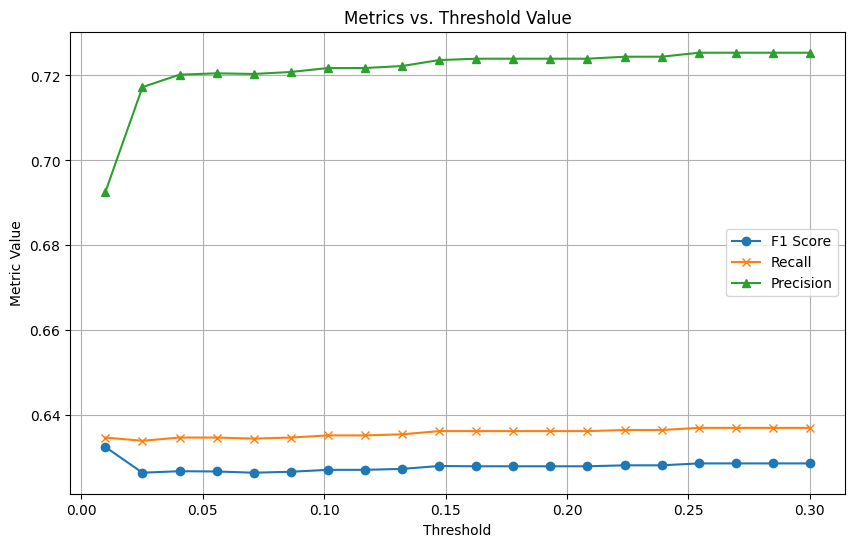

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Assuming you already have your `y_test` and `model_randomized` as in your code
# X_test should also be defined in your context
y_test = y_nucleus
thresholds = np.linspace(0.01, 0.3, 20)  # Vary threshold from 0.1 to 0.9 with 0.05 increments
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_test_pred = (class_probabilities[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_test_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_test_pred, average='weighted'))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, precisions, label='Precision', marker='^')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Threshold Value')
plt.legend()
plt.grid()
plt.show()

0.6377912867274569
0.635116846319202
0.6292773876763257


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

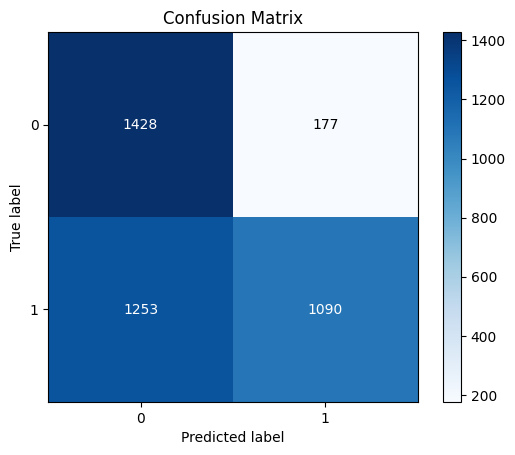

In [28]:
y_pred = class_probabilities[:,1] >= 0.4

accuracy = accuracy_score(y_nucleus, y_pred)
f1_macro = f1_score(y_nucleus, y_pred, average='macro')
f1_weighted = f1_score(y_nucleus, y_pred, average='weighted')
print(accuracy)
print(f1_macro)
print(f1_weighted)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

AUC:  0.7247971354987283


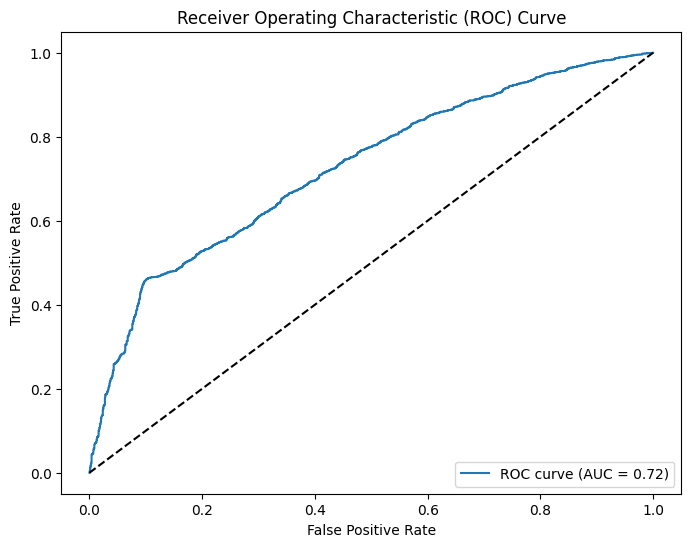

In [29]:
actual_labels = test_data[1]
predicted_probabilities = pipe.predict_proba(test_data[0])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)

# Compute AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)
print("AUC: ", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Get the most important features

<AxesSubplot:ylabel='Feature'>

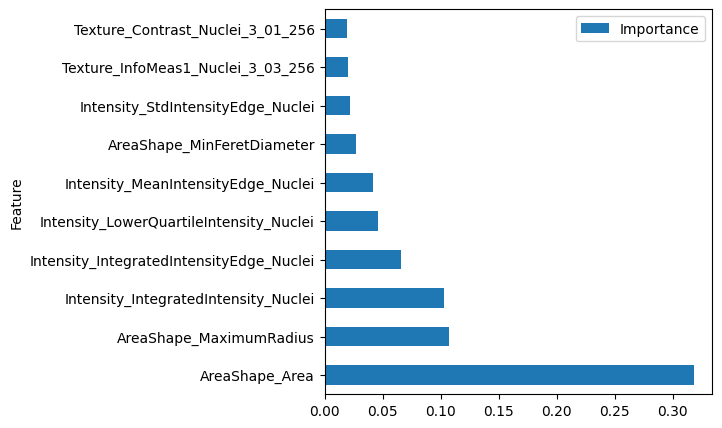

In [12]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD86+CD206 without intensity features

In [13]:
# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7100779967159276
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7235567816946189
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7113008003206721


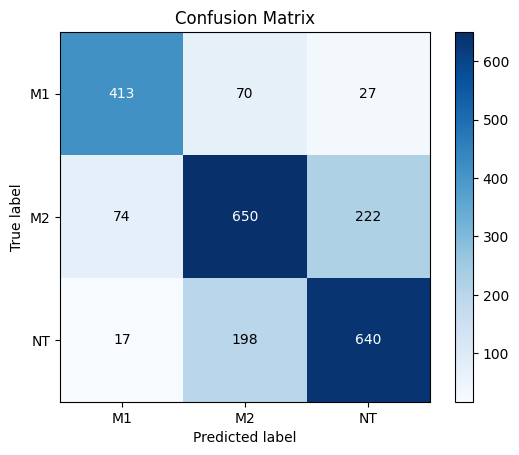

In [14]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9633591359919871
AUC score for M2 0.8447838982722703
AUC score for NT 0.8883763896921791
Average AUC 0.8988398079854788


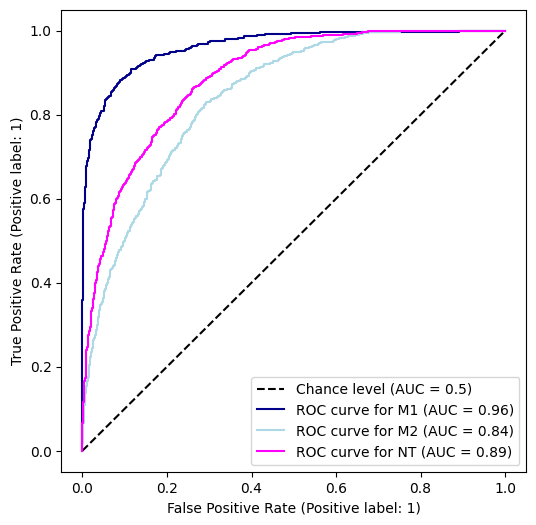

In [15]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

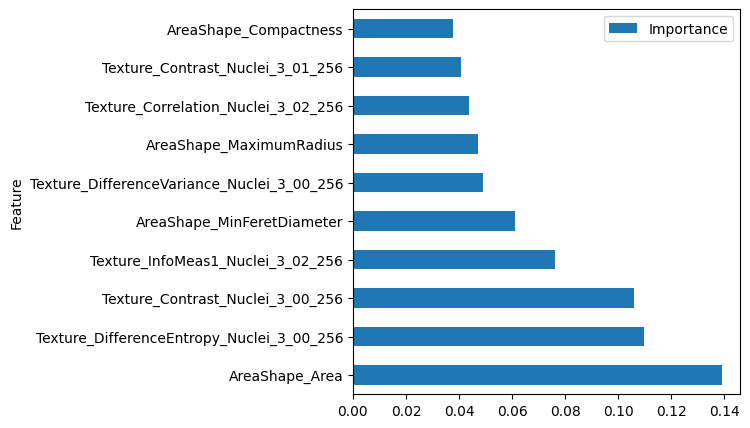

In [16]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86+CD206 without shape features

In [17]:
# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8251847290640395
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8302105998496057
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8254256295991702


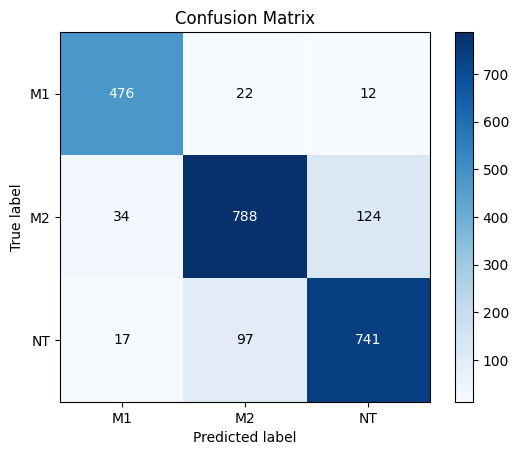

In [18]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9911857247063179
AUC score for M2 0.9483346111253088
AUC score for NT 0.9575099607994344
Average AUC 0.965676765543687


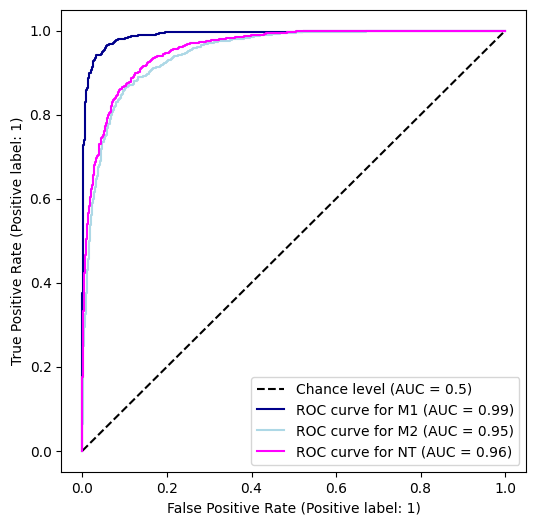

In [19]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

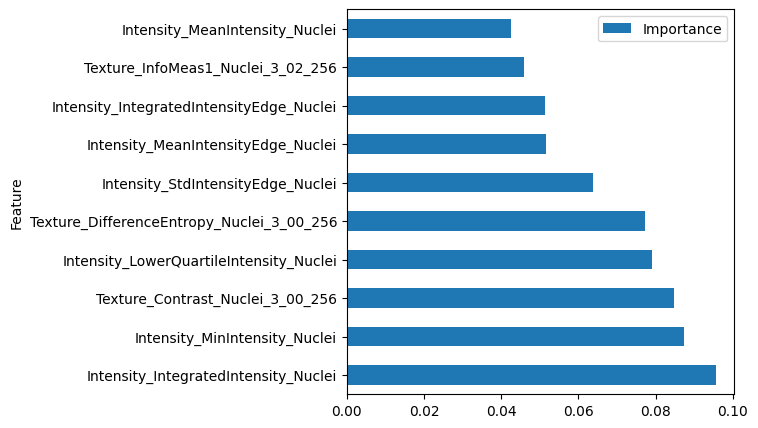

In [20]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
important_features_tcps.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))